FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/mrsri/Downloads/79d62530-0133-256x256.jpg'

ValueError: the input array must have size 3 along `channel_axis`, got (256, 256, 4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


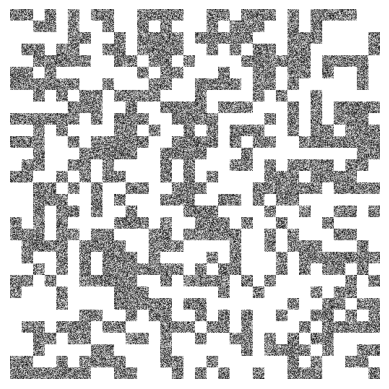

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import view_as_windows
from skimage.color import rgb2gray, rgb2lab, lab2rgb

def texture_synthesis(image1, image2, output_shape, patch_size):
    h, w, _ = output_shape  # Updated to handle color images
    output_texture = np.zeros(output_shape)

    # Generate patches from both images
    patches1 = view_as_windows(image1, (patch_size, patch_size, 3), step=patch_size)
    patches2 = view_as_windows(image2, (patch_size, patch_size, 3), step=patch_size)

    # Randomly select patches from both images and stitch them in the output texture
    for y in range(0, h, patch_size):
        for x in range(0, w, patch_size):
            if np.random.rand() < 0.5:
                patch = patches1[np.random.randint(patches1.shape[0]), np.random.randint(patches1.shape[1])]
            else:
                patch = patches2[np.random.randint(patches2.shape[0]), np.random.randint(patches2.shape[1])]

            output_texture[y:y + patch_size, x:x + patch_size] = patch

    return output_texture

# Example usage
image1 = plt.imread('C:/Users/mrsri/Downloads/3.jpg')
image2 = plt.imread('C:/Users/mrsri/Downloads/256x256_Dissolve_Noise_Texture.png')
output_shape = (512, 512, 3)  # Updated to specify color output shape
patch_size = 16

# Resize the input images to 256x256
image1 = image1[:256, :256]
image2 = image2[:256, :256]

output_texture = texture_synthesis(image1, image2, output_shape, patch_size)

# Display the synthesized texture
plt.imshow(output_texture)
plt.axis('off')
plt.show()